In [1]:
import os
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Import the relevant modules from the LSST stack.

In [2]:
from lsst.sims.movingObjects import Orbits
from lsst.sims.movingObjects import LinearObs
from lsst.sims.movingObjects import DirectObs

from lsst.sims.maf.db import OpsimDatabase
from lsst.sims.maf.batches import getColMap

The following functions are used directly from makeLSSTobs.py - a python script in $SIMS_MOVINGOBJECTS_DIR/bin:

* readOpsim
* readOrbits
* _setupColors
* runObs

In [3]:
import sys
sys.path.extend([os.path.join(os.getenv('SIMS_MOVINGOBJECTS_DIR'), 'bin.src')])
#print(sys.path)
from makeLSSTobs import readOpsim, readOrbits, _setupColors, runObs, setupArgs

In [54]:
nightLimit = int(365 * 5 + 1)
sqlConstraint = ' night < %d' % (nightLimit)
argvalues = ['--orbitFile', 'lsst_bright_NESCv9reintv1.TCO.withH.kep.des',
             '--opsimDb', 'kraken_2026.db', 
             '--obsFile', 'kraken_2026__notebook_obs.txt',
             '--sqlConstraint', '%s' % (sqlConstraint),
             '--footprint', 'circle',  
             '--rFov', '1.75', 
             '--roughTol', '50',
             '--tStep', '1.0',  
             '--ephMode', 'nbody', 
             '--prelimEphMode', 'nbody']
sys.argv = ['makeLSSTobs.py'] + argvalues
args = setupArgs()
print(args)

Namespace(ephMode='nbody', ephType='basic', footprint='circle', obsCode='I11', obsFile='./kraken_2026__notebook_obs.txt', obsMetadata='Opsim kraken_2026 selected with sqlconstraint  night < 1826 + Orbitfile lsst_bright_NESCv9reintv1.TCO.withH.kep', obsType='direct', opsimDb='kraken_2026.db', opsimRun='kraken_2026', orbitFile='lsst_bright_NESCv9reintv1.TCO.withH.kep.des', orbitbase='lsst_bright_NESCv9reintv1.TCO.withH.kep', outDir='.', prelimEphMode='nbody', rFov=1.75, roughTol=50.0, sqlConstraint=' night < 1826', tStep=1.0, xTol=5, yTol=3)


The next few cells are the individual steps which run in main of makeLSSTobs.py. 

In [55]:
# Read orbits.
orbits = readOrbits(args.orbitFile)

Read orbit information from lsst_bright_NESCv9reintv1.TCO.withH.kep.des


In [6]:
# Read opsim data
opsimdata, colmap = readOpsim(args.opsimDb, constraint=args.sqlConstraint, dbcols=None)

Queried data from opsim kraken_2026.db, fetched 1218336 visits.


In [7]:
opsimdata['observationStartMJD'].min(), opsimdata['observationStartMJD'].max()

(59853.016793981478, 61677.394699074073)

In [76]:
# Generate ephemerides.  -- skip and read from disk. 
runObs(orbits, opsimdata, args, colmap)

Using exact ephemeris generation: 
Generating preliminary ephemerides on a grid of 1.000000 day timesteps.


Let's check out the observations file.

In [37]:
obsFile = args.obsFile
obsFile = 'lsst_br_minimoon_circle.obs'
obsFile = 'lsst_br_minimoon_camera.obs'
d = pd.read_csv(obsFile, delim_whitespace=True, comment='#')
print(obsFile, len(d))

lsst_br_minimoon_camera.obs 669737


In [38]:
print(d.columns)
d[0:5]

Index(['objId', 'time', 'ra', 'dec', 'dradt', 'ddecdt', 'phase', 'solarelon',
       'helio_dist', 'geo_dist', 'magV', 'trueAnomaly', 'velocity',
       'observationStartMJD', 'night', 'fieldRA', 'fieldDec', 'rotSkyPos',
       'filter', 'visitExposureTime', 'seeingFwhmEff', 'seeingFwhmGeom',
       'fiveSigmaDepth', 'solarElong', 'magFilter', 'dmagColor', 'dmagTrail',
       'dmagDetect'],
      dtype='object')


,objId,time,ra,dec,dradt,ddecdt,phase,solarelon,helio_dist,geo_dist,...,filter,visitExposureTime,seeingFwhmEff,seeingFwhmGeom,fiveSigmaDepth,solarElong,magFilter,dmagColor,dmagTrail,dmagDetect
0,NESC000000MP,60062.178264,218.480910,-3.591698,-4.108637,-1.919735,10.874371,169.074956,1.011331,0.004785,...,y,30.0,0.827030,0.731819,22.059816,170.481702,25.314361,-0.407347,1.384583,2.691944
1,NESC000000MP,60063.187442,216.889150,-5.753383,-4.874526,-2.442663,8.535124,171.429764,1.011079,0.004235,...,y,30.0,0.894790,0.787517,21.971156,170.345638,24.958315,-0.407347,1.233318,2.385712
2,NESC000000MP,60064.155359,215.047178,-8.454395,-5.825453,-3.333646,6.345121,173.632247,1.010787,0.003675,...,y,30.0,0.938596,0.823526,21.897837,172.600167,24.552762,-0.407347,1.101207,2.114296
3,NESC000000MP,60064.155810,215.044519,-8.455900,-5.828615,-3.332639,6.344652,173.632721,1.010787,0.003675,...,y,30.0,0.928567,0.815282,21.921928,174.574606,24.552566,-0.407347,1.106238,2.124700
4,NESC000000MP,60065.161401,212.180930,-12.345330,-7.716708,-4.761990,6.009570,173.972145,1.010417,0.003045,...,z,30.0,0.877065,0.772948,22.848947,174.400328,24.134664,-0.399860,1.167726,2.251426


(0, 11000)

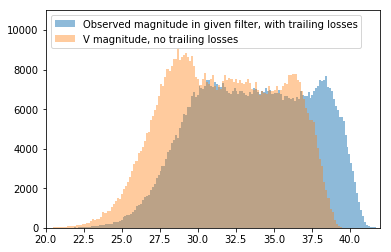

In [39]:
# Histogram of observed magnitude of all observations.
d['obsMag'] = d.magFilter + d.dmagTrail
#n, b, p = plt.hist(d.magFilter, bins=100, alpha=0.4, label='Magnitude in given filter, no trailing losses')
n, b, p = plt.hist(d.obsMag, bins=300, alpha=0.5, label='Observed magnitude in given filter, with trailing losses')
n, b, p = plt.hist(d.magV, bins=300, alpha=0.4, label='V magnitude, no trailing losses')
plt.legend(loc='upper left', fancybox=True)
plt.xlim(20, 42)
plt.ylim(0, 11000)

[]

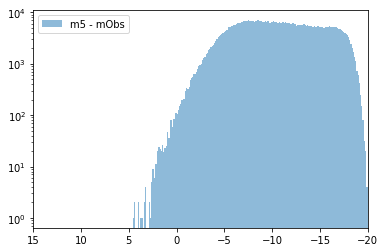

In [40]:
deltaMagLimit = d['fiveSigmaDepth'] - d['obsMag']

n, b, p = plt.hist(deltaMagLimit, bins=300, alpha=0.5, label='m5 - mObs')
plt.legend(loc='upper left', fancybox=True)
plt.xlim(15, -20)
#plt.ylim(0, 6000)
plt.semilogy()

In [42]:
# Pull out observations which are above 5 sigma SNR.  This cuts out a lot.
d5 = d.query('obsMag <= fiveSigmaDepth')
print(len(d5), len(d), len(np.where(deltaMagLimit>=0)[0]))

776 669737 776


(0, 140)

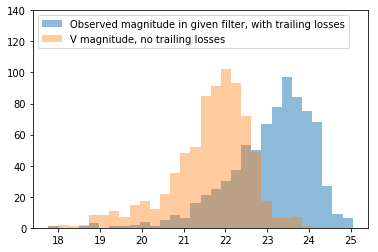

In [43]:
# Histogram of observed magnitude of all observations.
#n, b, p = plt.hist(d.magFilter, bins=100, alpha=0.4, label='Magnitude in given filter, no trailing losses')
n, b, p = plt.hist(d5.obsMag, bins=30, alpha=0.5, label='Observed magnitude in given filter, with trailing losses')
n, b, p = plt.hist(d5.magV, bins=b, alpha=0.4, label='V magnitude, no trailing losses')
plt.legend(loc='upper left', fancybox=True)
plt.ylim(0, 140)

In [44]:
# Group observations per object. -- only 13 objects actually got observations.
g = d5.groupby('objId')
print(len(g), len(d.groupby('objId')))

158 4554


In [45]:
d5.to_csv('lsst_br_minimoon_camera_above_m5.obs', sep=' ', index=False)

In [46]:
# How many observations did each object get? (at any magnitude)
g.agg(np.size)['magV']

objId
NESC000004k9     1.0
NESC000006bp     3.0
NESC000009Rx     2.0
NESC00000hnR     1.0
NESC00000ili     2.0
NESC00000kgP     3.0
NESC0000166s     4.0
NESC00001HYj     1.0
NESC00001R9E     3.0
NESC00001WIA     1.0
NESC00002CVt     4.0
NESC00002NJv     1.0
NESC00002p3O     2.0
NESC00002tM9     2.0
NESC00002uyR     3.0
NESC00003Cge     2.0
NESC00003Ya7     1.0
NESC00003bTJ     2.0
NESC00004Fww     2.0
NESC00004IOO    29.0
NESC00004bSh     1.0
NESC00004clT     1.0
NESC000055Qk     3.0
NESC00005WrG     2.0
NESC00005jzu     4.0
NESC00005v2k     5.0
NESC000061et     2.0
NESC00006vjo     1.0
NESC00007FBV    10.0
NESC00007RGs     7.0
                ... 
NESC0000p83u     5.0
NESC0000py7E     3.0
NESC0000qvhT     4.0
NESC0000r7K6     5.0
NESC0000rwAH     1.0
NESC0000s1QJ    16.0
NESC0000sDez     4.0
NESC0000sJxI     2.0
NESC0000sLqJ     5.0
NESC0000svjM     1.0
NESC0000tfdo    11.0
NESC0000uJ8x     3.0
NESC0000un3T     2.0
NESC0000v2K5    29.0
NESC0000vFbE     6.0
NESC0000vtjG     1.0
NESC000

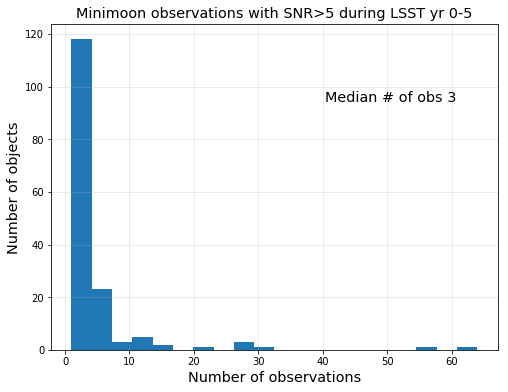

In [47]:
meanNo = g.agg(np.size)['magV'].median()
plt.figure(figsize=(8, 6))
n,b,p = plt.hist(g.agg(np.size)['magV'], bins=20)
plt.xlabel("Number of observations", fontsize='x-large')
plt.ylabel("Number of objects", fontsize='x-large')
plt.title("Minimoon observations with SNR>5 during LSST yr 0-5", fontsize='x-large')
plt.figtext(0.6, 0.7, 'Median # of obs %d' % (meanNo), fontsize='x-large')
#plt.xlim(0, 50)
plt.grid(True, alpha=0.3)

In [48]:
names_n = g.agg(np.size).query('magV > 6').index.values
print(names_n)
print(len(names_n))

['NESC00004IOO' 'NESC00007FBV' 'NESC00007RGs' 'NESC00008Uab' 'NESC00008l32'
 'NESC00008pS5' 'NESC00009aXX' 'NESC0000EKfT' 'NESC0000F6Fw' 'NESC0000Fm0a'
 'NESC0000a1TA' 'NESC0000bRto' 'NESC0000e16Z' 'NESC0000eNbl' 'NESC0000fMdk'
 'NESC0000gkL2' 'NESC0000lDbk' 'NESC0000s1QJ' 'NESC0000tfdo' 'NESC0000v2K5'
 'NESC0000y8PZ']
21


In [49]:
d5.query('objId in @names_n').groupby('objId')['objId'].agg('count')

objId
NESC00004IOO    29
NESC00007FBV    10
NESC00007RGs     7
NESC00008Uab     7
NESC00008l32    11
NESC00008pS5     7
NESC00009aXX    30
NESC0000EKfT     9
NESC0000F6Fw    12
NESC0000Fm0a    12
NESC0000a1TA    14
NESC0000bRto    57
NESC0000e16Z    23
NESC0000eNbl    10
NESC0000fMdk    27
NESC0000gkL2    13
NESC0000lDbk     7
NESC0000s1QJ    16
NESC0000tfdo    11
NESC0000v2K5    29
NESC0000y8PZ    64
Name: objId, dtype: int64

In [50]:
# Let's just run the MAF discovery metric right here (on the objects in 'd')! 
from lsst.sims.maf import batches
print(obsFile, args.orbitFile)
slicer = batches.setupMoSlicer(orbitFile=args.orbitFile, Hrange=None, obsFile=None)
slicer.allObs = d
slicer.obs = d
slicer.obsFile = obsFile

lsst_br_minimoon_camera.obs lsst_bright_NESCv9reintv1.TCO.withH.kep.des


In [57]:
slicer.orbits[0:2]

,objId,a,e,inc,Omega,argPeri,meanAnomaly,H,epoch,g,sed_filename
0,NESC000000MP,1.015676,0.011896,0.591993,55.285039,53.781844,7.470065,36.606747,59958.954567,0.15,S.dat
1,NESC000001R0,0.987549,0.025146,0.780098,178.767627,258.189147,131.043276,32.922122,61153.011344,0.15,S.dat


In [51]:
timestep = 30.
times = np.arange(d.time.min(), d.time.max()+timestep/2.0, timestep)
metricBundles, plots = batches.quickDiscoveryBatch(slicer, colmap=colmap, runName='kraken_2026', 
                                                   detectionLosses='detection', metadata='TCO',
                                                   albedo=None, Hmark=22, times=times)

In [67]:
for k in metricBundles:
    for k2 in metricBundles[k].childBundles:
        metricBundles[k].childBundles[k2].summaryMetrics = []

In [68]:
import lsst.sims.maf.metricBundles as mb
mg = mb.MoMetricBundleGroup(metricBundles)

In [69]:
mg.runAll()

Running metrics ['kraken_2026_Discovery_2x3in15_TCO_3_pairs_in_15_nights_SNReq5_detection_loss_MOOB', 'kraken_2026_Discovery_2x3in30_TCO_3_pairs_in_30_nights_SNReq5_detection_loss_MOOB']
Calculated and saved all metrics.


In [32]:
metricBundles

{'kraken_2026_Discovery_2x3in15_TCO_3_pairs_in_15_nights_SNReq5_detection_loss_MOOB': <lsst.sims.maf.metricBundles.moMetricBundle.MoMetricBundle at 0x106a8fe48>,
 'kraken_2026_Discovery_2x3in30_TCO_3_pairs_in_30_nights_SNReq5_detection_loss_MOOB': <lsst.sims.maf.metricBundles.moMetricBundle.MoMetricBundle at 0x1068ef0f0>}

In [33]:
disc1 = metricBundles['kraken_2026_Discovery_2x3in15_TCO_3_pairs_in_15_nights_SNReq5_detection_loss_MOOB']

In [34]:
len(disc1.metricValues.compressed())

3

In [36]:
disc2 = metricBundles['kraken_2026_Discovery_2x3in30_TCO_3_pairs_in_30_nights_SNReq5_detection_loss_MOOB']
len(disc2.metricValues.compressed())

5

In [70]:
disc2.metricValues.compressed()

array([ {'start': array([21]), 'end': array([30]), 'trackletNights': array([ 550,  553,  915,  918, 1058, 1060, 1260, 1266, 1384, 1387, 1390])},
       {'start': array([], dtype=int64), 'end': array([], dtype=int64), 'trackletNights': array([520, 521, 590])},
       {'start': array([0]), 'end': array([5]), 'trackletNights': array([1669, 1670, 1672])},
       {'start': array([0]), 'end': array([5]), 'trackletNights': array([10, 15, 16])},
       {'start': array([], dtype=int64), 'end': array([], dtype=int64), 'trackletNights': array([ 271,  295,  995, 1029])}], dtype=object)